# ATE naive estimation

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils as utl

In [2]:
data = pkl.load(open('../data/data.pkl', 'rb'))
data.head(2)

,confidence,index,time,token_path,term_match,word_net,T,Y
0,46.0,16,17.0,14.2148,12.0,11.2946,1,80
1,37.4,16,13.0,14.2148,12.0,11.2946,0,28


In [3]:
def ATE(data):
    means = data[['T','Y']].groupby('T').mean()
    ATE = (means.loc[1] - means.loc[0]).item()
    return ATE
print(f"ATE over original data: {ATE(data)}")

ATE over original data: 17.862195998673926


In [4]:
results = utl.generate_CI(data, ATE, f_kwargs={}, samples=1000, alpha=0.95)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 225.78it/s]


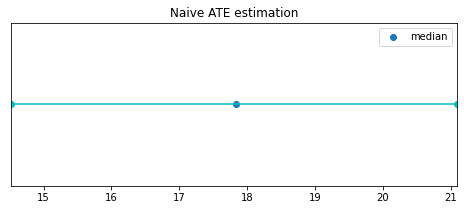

In [5]:
plt.figure(figsize=(8,3))
plot = (
            'm',
            # 'a',
        )
utl.plot_CI(**results, plot=plot, title='Naive ATE estimation', xlim_l=None, xlim_u=None)

## Saving

In [6]:
save = True
saving_list = [(results, 'naive ATE')]
if save:
    for var, name in saving_list:
        pkl.dump(var, open(f'../results/{name}', 'wb'))